In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

In [2]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils

print()

In [3]:
temp_dir = "../temp/"

def init_dir(dir):
    try:
        if os.path.exists(dir):
            shutil.rmtree(dir)
            os.makedirs(dir)
            print("Clear the directory: {}".format(dir))
        else:
            os.makedirs(dir)
            print("Create the directory: {}".format(dir))
    except OSError:
        init_dir(dir)
init_dir(temp_dir)

def savefig(fig, file_name):
    fig.savefig(temp_dir + file_name + ".png")
    print("Image file saved:", temp_dir + file_name + ".png")

Create the directory: ../temp/


In [4]:
print("Loading data...")
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print("Done")
print("x_train_image.shape = {}".format(x_train_image.shape))
print("y_train_label.shape = {}".format(y_train_label.shape))
print(" x_test_image.shape = {}".format(x_test_image.shape))
print(" y_test_label.shape = {}\n".format(y_test_label.shape))

Loading data...
Done
x_train_image.shape = (60000, 28, 28)
y_train_label.shape = (60000,)
 x_test_image.shape = (10000, 28, 28)
 y_test_label.shape = (10000,)



Image file saved: ../temp/cnn_images_train_0_7.png



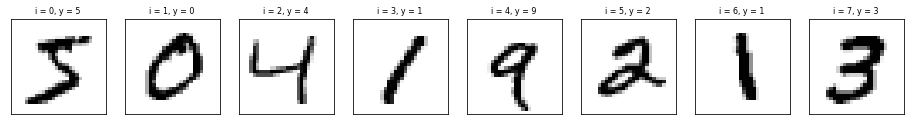

In [5]:
images_per_row = 8
defualt_row_number = 1
max_row_number = 3

def plot_images_labels_prediction(images, labels,
                                  prediction = [],
                                  start_index = 0,
                                  num = images_per_row * defualt_row_number):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(images_per_row * 2, images_per_row * 1.5)
    if num > images_per_row * max_row_number:
        raise ValueError("The maximum data number to print is " + str(images_per_row * max_row_number) + ".")
    for i in range(0, num):
        ax = plt.subplot(max_row_number, images_per_row, 1 + i)
        ax.imshow(images[start_index], cmap="binary")
        title = "i = " + str(start_index) + ", y = " + str(labels[start_index])
        if len(prediction) > 0:
            title += ", predict = " + str(prediction[start_index])
        ax.set_title(title, fontsize = 8)
        ax.set_xticks([])
        ax.set_yticks([])
        start_index += 1
#   plt.show()
    if len(prediction) <= 0:
        savefig(fig, "cnn_images_train_" + str(start_index - num) + "_" + str(start_index - 1))
    else:
        savefig(fig, "cnn_images_test_" + str(start_index - num) + "_" + str(start_index - 1))

plot_images_labels_prediction(x_train_image, y_train_label)
print()

In [6]:
# normalize input image, 0 < input < 1
def normalize_input(input_image):
    return input_image.reshape(input_image.shape[0], 28, 28, 1).astype("float64") / 255

# normalize output label as one-hot encoding, for example, 4 will normalize as [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
def normalize_output(output_label):
    return np_utils.to_categorical(output_label)

# data preprocessing
x_train = normalize_input(x_train_image)
x_test  = normalize_input(x_test_image)
y_train = normalize_output(y_train_label)
y_test  = normalize_output(y_test_label)

In [7]:
# create convolutional neural network
model = Sequential()
# convolutional layer 1
model.add(
    Conv2D(
        filters = 16, # the number of output filters
        kernel_size = (5, 5), # the width and height of the 2D convolution window
        padding = "same", # not changing data shape
        input_shape = (28, 28, 1),
        activation = "relu"
    )
)
# pooling layer 1
model.add(
    MaxPooling2D(
        pool_size = (2, 2)
    )
)
# convolutional layer 2
model.add(
    Conv2D(filters = 36,
        kernel_size = (5, 5),
            padding = "same",
            input_shape = (28, 28, 1),
            activation = "relu"
    )
)
# pooling layer 2
model.add(
    MaxPooling2D(
        pool_size = (2, 2)
    )
)
# dropout layer
model.add(
    Dropout(
        rate = 0.5
    )
)
# flatten layer
model.add(
    Flatten()
)
# hidden layer 1
model.add(
    Dense(
        units = 100,
        activation = "relu",
        kernel_initializer = "normal",
        bias_initializer = "normal"
    )
)
# hidden layer 2
model.add(
    Dense(
        units = 10,
        activation = "softmax",
        kernel_initializer = "normal",
        bias_initializer = "normal"
    )
)
print(model.summary(), "\n")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               176500    
__________

In [8]:
# definite training method
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [9]:
# start training, by TensorFlow for CPU
train_history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 300,
    epochs = 20,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 41s 852us/step - loss: 0.5286 - acc: 0.8402 - val_loss: 0.1248 - val_acc: 0.9624
Epoch 2/20
48000/48000 [==============================] - 41s 845us/step - loss: 0.1290 - acc: 0.9603 - val_loss: 0.0760 - val_acc: 0.9773
Epoch 3/20
48000/48000 [==============================] - 41s 853us/step - loss: 0.0944 - acc: 0.9711 - val_loss: 0.0641 - val_acc: 0.9804
Epoch 4/20
48000/48000 [==============================] - 41s 859us/step - loss: 0.0773 - acc: 0.9751 - val_loss: 0.0586 - val_acc: 0.9808
Epoch 5/20
48000/48000 [==============================] - 42s 870us/step - loss: 0.0672 - acc: 0.9785 - val_loss: 0.0483 - val_acc: 0.9850
Epoch 6/20
48000/48000 [==============================] - 42s 873us/step - loss: 0.0599 - acc: 0.9816 - val_loss: 0.0480 - val_acc: 0.9861
Epoch 7/20
48000/48000 [==============================] - 42s 873us/step - loss: 0.0525 - acc: 0.9834 - val_loss: 0.

In [10]:
def show_train_history(train_history, train, validation):
    plt.clf()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc = "upper left")
#   plt.show()
    savefig(plt, "cnn_training_history_" + train)

Image file saved: ../temp/cnn_training_history_acc.png


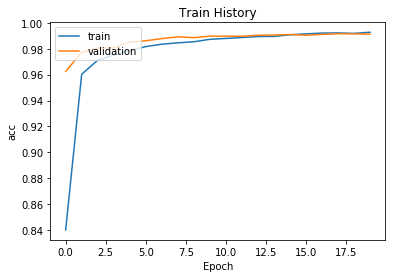

In [11]:
show_train_history(train_history, "acc", "val_acc")

Image file saved: ../temp/cnn_training_history_loss.png



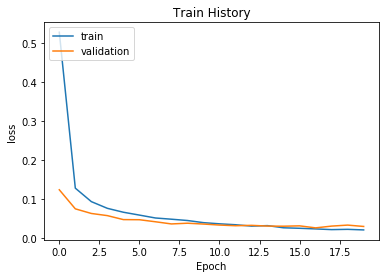

In [12]:
show_train_history(train_history, "loss", "val_loss")
print()

In [13]:
print("Evaluating: ")
scores = model.evaluate(x_test, y_test)
print("The loss of testing data:", scores[0])
print("The accuracy of testing data = {}%".format(scores[1] * 100.0))

Evaluating: 
10000/10000 [==============================] - 4s 359us/step
The loss of testing data: 0.02244377018182713
The accuracy of testing data = 99.24%


In [14]:
print("Predicting: ")
prediction = model.predict_classes(x_test, verbose = 1)
print(pd.crosstab(y_test_label, prediction, colnames=["predict"], rownames=["y"]), "\n")

Predicting: 
10000/10000 [==============================] - 3s 348us/step
predict    0     1     2     3    4    5    6     7    8    9
y                                                            
0        978     0     0     0    0    0    1     1    0    0
1          0  1132     1     0    0    0    1     1    0    0
2          2     1  1021     1    0    0    0     5    2    0
3          0     0     0  1003    0    4    0     1    2    0
4          0     0     0     0  981    0    0     0    0    1
5          2     0     0     4    0  882    3     0    0    1
6          3     2     0     0    2    0  951     0    0    0
7          0     0     2     0    0    0    0  1022    1    3
8          2     0     1     1    0    1    1     2  964    2
9          0     0     0     0   10    4    0     3    2  990 



In [15]:
print("Data frame for error cases:")
df = pd.DataFrame({"label": y_test_label, "predict": prediction})
error_list = df.loc[df.label != df.predict]
print(error_list, "\n")

Data frame for error cases:
      label  predict
321       2        7
445       6        0
449       3        5
582       8        2
583       2        7
659       2        1
924       2        7
938       3        5
1014      6        0
1032      5        6
1039      7        2
1226      7        2
1232      9        4
1247      9        5
1319      8        0
1393      5        3
1459      2        3
1530      8        7
1709      9        5
1878      8        3
1901      9        4
2070      7        9
2098      2        0
2130      4        9
2135      6        1
2293      9        4
2406      9        4
2414      9        4
2597      5        3
2654      6        1
...     ...      ...
4224      9        7
4284      9        5
4289      2        8
4360      5        3
4369      9        4
4497      8        7
4740      3        5
4761      9        8
4823      9        4
4879      8        6
5937      5        3
5955      3        8
5973      3        8
5997      5        9
6555  

The error case is at i = 318
Image file saved: ../temp/cnn_images_test_318_325.png



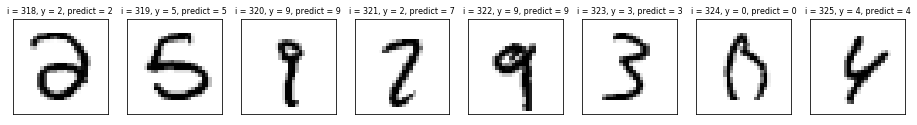

In [16]:
print("The error case is at i = {}".format(error_list.index[0] - 3))
plot_images_labels_prediction(x_test_image, y_test_label, prediction, start_index = max(0, error_list.index[0] - 3))
print()

In [17]:
print("Process ended.", "\n")

Process ended. 

